# Projet 4: Anticipez les besoins en consommation de bâtiments

### Chargement des librairies

In [2]:
from urllib import request
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot, transforms
import seaborn as sns
import numpy as np
import re
import IPython.display
sns.set()

### lecture de données 

In [3]:
filepath_2016 = 'C:/Users/Mohamed/Desktop/formation_data_Scientist/projet_4/Donnees//data_to_clean/df_2016_to_cleand.csv'

In [4]:
data_2016= pd.read_csv(filepath_2016)

In [5]:
data_2016

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,Compliant,NaN,22.11,1.57


In [1163]:
data_2016.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697
ThirdLargestPropertyUseType        2780


In [1164]:
col_to_drop=['SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'LargestPropertyUseType',  ]
def tiny_name(df):
    Object_columns = df.select_dtypes(include = 'object')
    for col in Object_columns:
        df[col] = df[col].apply(lambda x: str(x).lower())
        df[col] = df[col].apply(lambda x: str(x).capitalize())
        df[col] = df[col].replace('Nan', np.nan)
    df['City'] = df['City'].apply(lambda x:'Seattlle')
    return df 
tiny_name(data_2016)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,Nonresidential,Hotel,Mayflower park hotel,405 olive way,Seattlle,Wa,98101.0,0659000030,...,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,Compliant,NaN,249.98,2.83
1,2,2016,Nonresidential,Hotel,Paramount hotel,724 pine street,Seattlle,Wa,98101.0,0659000220,...,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,Compliant,NaN,295.86,2.86
2,3,2016,Nonresidential,Hotel,5673-the westin seattle,1900 5th avenue,Seattlle,Wa,98101.0,0659000475,...,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,Compliant,NaN,2089.28,2.19
3,5,2016,Nonresidential,Hotel,Hotel max,620 stewart st,Seattlle,Wa,98101.0,0659000640,...,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,Compliant,NaN,286.43,4.67
4,8,2016,Nonresidential,Hotel,Warwick seattle hotel (id8),401 lenora st,Seattlle,Wa,98121.0,0659000970,...,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential cos,Office,Horticulture building,1600 s dakota st,Seattlle,Wa,NaN,1624049080,...,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,Error - correct default data,NaN,20.94,1.70
3372,50223,2016,Nonresidential cos,Other,International district/chinatown cc,719 8th ave s,Seattlle,Wa,NaN,3558300000,...,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential cos,Other,Queen anne pool,1920 1st ave w,Seattlle,Wa,NaN,1794501150,...,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential cos,Mixed use property,South park community center,8319 8th ave s,Seattlle,Wa,NaN,7883603155,...,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,Compliant,NaN,22.11,1.57


## 1: Nettoyage des données 

### 1.1 : Affichage des données manquntes

C:\Users\Mohamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


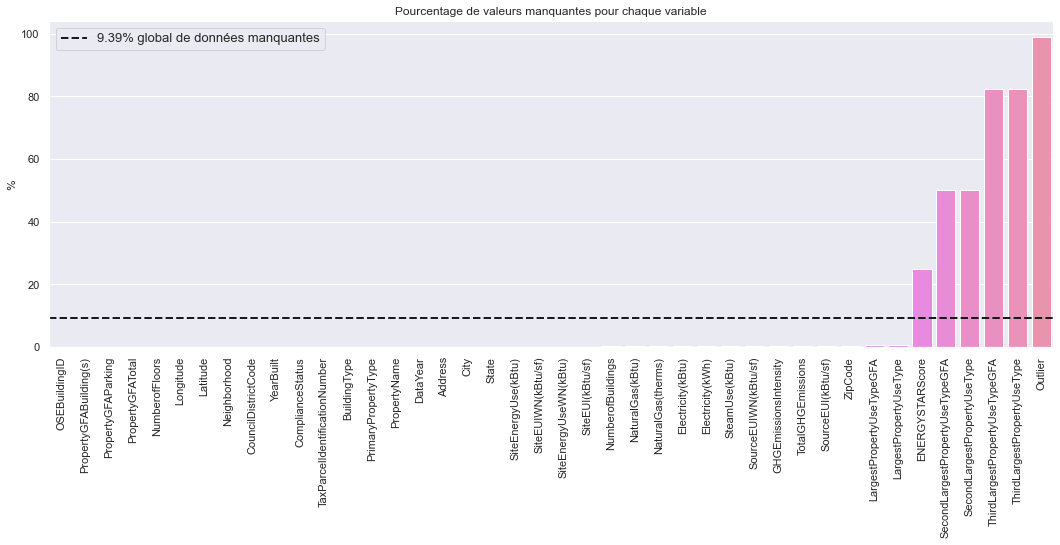

In [1165]:
null_prop = data_2016.isnull().sum(axis=0).sum()/len(data_2016)/len(data_2016.columns)*100
null = data_2016.isnull().sum(axis=0).sort_values()/len(data_2016)*100
fig = plt.figure(figsize=(18, 6))
plt.axhline(y=null_prop, color='k', linestyle='--', lw=2)
plt.legend(['{:.2f}% global de données manquantes'.format(null_prop)], fontsize=13)
sns.barplot(null.index, null.values)
plt.ylabel("%")
plt.title("Pourcentage de valeurs manquantes pour chaque variable")
plt.xticks(rotation=90)
plt.show()

### 1.2: Filtre sur les Nonresidential buildings

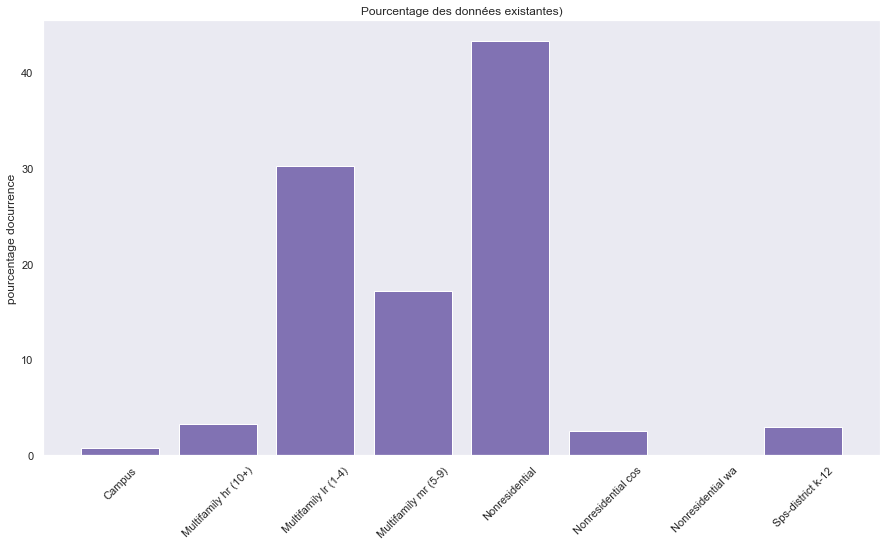

In [1166]:
building_type = data_2016.groupby(by='BuildingType')['OSEBuildingID'].count()/len(data_2016)*100
fig, ax = plt.subplots(figsize = (15, 8))
ax.bar(x = building_type.index, height = building_type .values, color='m', align='center')
ax.set_title('Pourcentage des données existantes)')
ax.set_ylabel('pourcentage docurrence')
ax.tick_params(axis='x', labelrotation=45)
ax.grid(False)

In [1167]:
def filre_type(df):
    building_type_to_keep = ['Nonresidential',  'Nonresidential cos', 'Nonresidential wa', 'Sps-district k-12', 'Campus'] 
    print('le shpae de data_2016 avant le filtre sur Nonresidential Building est:', df.shape)
    df = df[df['BuildingType'].isin(building_type_to_keep)]
    print('le shpae de data_2016 après le filtresur Nonresidential Building est:', df.shape)
    return df
data_2016 = filre_type(data_2016)

le shpae de data_2016 avant le filtre sur Nonresidential Building est: (3376, 42)
le shpae de data_2016 après le filtresur Nonresidential Building est: (1668, 42)


## 2: Vérification de l'existence des données négatives pour les variables énergétiques et les variables surfaces

### 2.1 : Variables énergétiques 

In [1168]:
#connaitre les variables quantitatives qui contiennent des valeurs négatives
liste = ['SourceEUIWN(kBtu/sf)', 'Electricity(kWh)', 'Electricity(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'] 
for label in liste:
     print("Le nombre de bâtiments dont {} est <0 est de : {}".format(label,  sum(data_2016[label]<0.0)))
data_2016 = data_2016[data_2016[label]>0.0] 

Le nombre de bâtiments dont SourceEUIWN(kBtu/sf) est <0 est de : 1
Le nombre de bâtiments dont Electricity(kWh) est <0 est de : 1
Le nombre de bâtiments dont Electricity(kBtu) est <0 est de : 1
Le nombre de bâtiments dont TotalGHGEmissions est <0 est de : 1
Le nombre de bâtiments dont GHGEmissionsIntensity est <0 est de : 1


In [1169]:
for label in ["PropertyGFATotal"] :
    print("Le nombre de bâtiments dont {} est <0 est de : {}".format(label, sum(data_2016[label]<0.0)))
    values_to_nan = data_2016.loc[data_2016 [label]<0, label].unique()
data_2016[label].replace(values_to_nan, np.nan, inplace=True)

Le nombre de bâtiments dont PropertyGFATotal est <0 est de : 0


### 2.2 : Valeurs négatives pour les surfaces

In [1170]:
def check_negative_Area(data_2016):
    for label in ["PropertyGFAParking", "PropertyGFABuilding(s)"] :
        print("Le nombre de bâtiments dont {} est <0 est de : {}".format(label, sum(data_2016[label]<0.0)))
        values_to_nan = data_2016.loc[data_2016 [label]<0, label].unique()
        if sum(data_2016[label]<0.0)> 0:
            print('il y a des valeurs aberrantes pour la surface')
            data_2016 = data_2016[label].replace(values_to_nan, np.nan, inplace=True)
        else:
            print('pas de valeurs aberrantes pour la surface')
    return data_2016
check_negative_Area(data_2016)

Le nombre de bâtiments dont PropertyGFAParking est <0 est de : 0
pas de valeurs aberrantes pour la surface
Le nombre de bâtiments dont PropertyGFABuilding(s) est <0 est de : 0
pas de valeurs aberrantes pour la surface


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,Nonresidential,Hotel,Mayflower park hotel,405 olive way,Seattlle,Wa,98101.0,0659000030,...,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,Compliant,NaN,249.98,2.83
1,2,2016,Nonresidential,Hotel,Paramount hotel,724 pine street,Seattlle,Wa,98101.0,0659000220,...,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,Compliant,NaN,295.86,2.86
2,3,2016,Nonresidential,Hotel,5673-the westin seattle,1900 5th avenue,Seattlle,Wa,98101.0,0659000475,...,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,Compliant,NaN,2089.28,2.19
3,5,2016,Nonresidential,Hotel,Hotel max,620 stewart st,Seattlle,Wa,98101.0,0659000640,...,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,Compliant,NaN,286.43,4.67
4,8,2016,Nonresidential,Hotel,Warwick seattle hotel (id8),401 lenora st,Seattlle,Wa,98121.0,0659000970,...,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential cos,Office,Horticulture building,1600 s dakota st,Seattlle,Wa,NaN,1624049080,...,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,Error - correct default data,NaN,20.94,1.70
3372,50223,2016,Nonresidential cos,Other,International district/chinatown cc,719 8th ave s,Seattlle,Wa,NaN,3558300000,...,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential cos,Other,Queen anne pool,1920 1st ave w,Seattlle,Wa,NaN,1794501150,...,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential cos,Mixed use property,South park community center,8319 8th ave s,Seattlle,Wa,NaN,7883603155,...,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,Compliant,NaN,22.11,1.57


## 3: Traitement des données manquantes et des outliers

In [1171]:
data_2016['BuildingType'].unique()

array(['Nonresidential', 'Nonresidential cos', 'Sps-district k-12',
       'Campus', 'Nonresidential wa'], dtype=object)

## 3.1 : Traitement des données manquantes et des outliers

In [1172]:
def filre_energy(df):
    
    list_energy = ['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)']

    energy_sum = df[list_energy].sum(axis=1)
    tot_energy_use = df["SiteEnergyUse(kBtu)"]
    df["diff_energy"] = abs((tot_energy_use - energy_sum))*100/tot_energy_use
                      
    print("Le nombre de bâtiments où diff_energy' > 5 % : avant le filtre est: {}".format(sum(df["diff_energy"]>=5)))
                      
    df = df[df["diff_energy"]<5]
    print("Le nombre de bâtiments où diff_energy' > 5 % : apres le filtre est: {}" \
          .format(sum(df["diff_energy"]>=5)))
    df = df.drop(columns=["diff_energy"])
    return df
filre_energy(data_2016)

Le nombre de bâtiments où diff_energy' > 5 % : avant le filtre est: 28
Le nombre de bâtiments où diff_energy' > 5 % : apres le filtre est: 0


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,Nonresidential,Hotel,Mayflower park hotel,405 olive way,Seattlle,Wa,98101.0,0659000030,...,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,Compliant,NaN,249.98,2.83
1,2,2016,Nonresidential,Hotel,Paramount hotel,724 pine street,Seattlle,Wa,98101.0,0659000220,...,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,Compliant,NaN,295.86,2.86
2,3,2016,Nonresidential,Hotel,5673-the westin seattle,1900 5th avenue,Seattlle,Wa,98101.0,0659000475,...,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,Compliant,NaN,2089.28,2.19
3,5,2016,Nonresidential,Hotel,Hotel max,620 stewart st,Seattlle,Wa,98101.0,0659000640,...,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,Compliant,NaN,286.43,4.67
4,8,2016,Nonresidential,Hotel,Warwick seattle hotel (id8),401 lenora st,Seattlle,Wa,98121.0,0659000970,...,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential cos,Office,Horticulture building,1600 s dakota st,Seattlle,Wa,NaN,1624049080,...,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,Error - correct default data,NaN,20.94,1.70
3372,50223,2016,Nonresidential cos,Other,International district/chinatown cc,719 8th ave s,Seattlle,Wa,NaN,3558300000,...,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential cos,Other,Queen anne pool,1920 1st ave w,Seattlle,Wa,NaN,1794501150,...,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential cos,Mixed use property,South park community center,8319 8th ave s,Seattlle,Wa,NaN,7883603155,...,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,Compliant,NaN,22.11,1.57


## 4:  Outliers et imputation des données manquantes

### 4.1: Filtre sur compliance status

In [1173]:
def filtre_compliant(df):
    
    Compliance_Rate =  df[df['ComplianceStatus'] == 'Compliant']\
                      ['ComplianceStatus'].count()/len(df)*100
    
    print("Compliance Rate data: ", Compliance_Rate)
    print(df.shape)
    
    #filtre sur les statuts compliants si le taux de compliance est > 90%
    if Compliance_Rate >= 90:
        df  = df[df['ComplianceStatus'] == 'Compliant']
        print(df.shape)
    else:
        print('le taux du non compliance est > 10% ')
    return df
data_2016 = filtre_compliant(data_2016)

Compliance Rate data:  93.30114665057333
(1657, 43)
(1546, 43)


In [1174]:
data_2016

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,diff_energy
0,1,2016,Nonresidential,Hotel,Mayflower park hotel,405 olive way,Seattlle,Wa,98101.0,0659000030,...,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,Compliant,NaN,249.98,2.83,6.919110e-06
1,2,2016,Nonresidential,Hotel,Paramount hotel,724 pine street,Seattlle,Wa,98101.0,0659000220,...,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,Compliant,NaN,295.86,2.86,0.000000e+00
2,3,2016,Nonresidential,Hotel,5673-the westin seattle,1900 5th avenue,Seattlle,Wa,98101.0,0659000475,...,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,Compliant,NaN,2089.28,2.19,8.265940e-06
3,5,2016,Nonresidential,Hotel,Hotel max,620 stewart st,Seattlle,Wa,98101.0,0659000640,...,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,Compliant,NaN,286.43,4.67,1.103820e-05
4,8,2016,Nonresidential,Hotel,Warwick seattle hotel (id8),401 lenora st,Seattlle,Wa,98121.0,0659000970,...,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,Compliant,NaN,505.01,2.88,7.055865e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,50221,2016,Nonresidential cos,Other,High point community center,6920 34th ave sw,Seattlle,Wa,NaN,2524039059,...,0.00,1.853347e+05,6.323620e+05,2997.199951,2.997200e+05,Compliant,NaN,20.33,1.11,1.317480e-05
3372,50223,2016,Nonresidential cos,Other,International district/chinatown cc,719 8th ave s,Seattlle,Wa,NaN,3558300000,...,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,Compliant,NaN,32.17,2.01,1.631105e-05
3373,50224,2016,Nonresidential cos,Other,Queen anne pool,1920 1st ave w,Seattlle,Wa,NaN,1794501150,...,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,Compliant,NaN,223.54,16.99,3.104460e-06
3374,50225,2016,Nonresidential cos,Mixed use property,South park community center,8319 8th ave s,Seattlle,Wa,NaN,7883603155,...,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,Compliant,NaN,22.11,1.57,1.459405e-06


### 4.2: Correction du nombre de bâtiments (ne peut être nul)

In [1175]:
def outlier_NumberofBuildings(df):
    
    #Vérification de l'existence des valeurs nulles pour numéro des batiments
    zero_value = (df['NumberofBuildings'] == 0).sum()
    
    #remplacer des valeurs nulles par la valeur la plus fréquente de la médiane
    median_groupby =  df.groupby('PrimaryPropertyType')\
                      ['NumberofBuildings'].median().value_counts()
    
    most_frequen_median = median_groupby.mode()[0]
    print('la valeur la plus fréquante de la médiane est:', most_frequen_median)
    
    if zero_value != 0:
        print('le nombre de valeurs nulle pour NumberofBuildings dans le datatset est:', zero_value)
   
        df['NumberofBuildings'] = df['NumberofBuildings'].replace({0: most_frequen_median})
        zero_value_imput = (df['NumberofBuildings'] == 0).sum()
        
        print('le nombre de valeurs nulle pour NumberofBuildings dans le datatset après limputaion est:', (zero_value_imput))
              
    else:
        print('je ne trouve pas une valeur nulle pour NumberofBuildings dans le datatset')
              
    return df
data_2016 = outlier_NumberofBuildings(data_2016) 

la valeur la plus fréquante de la médiane est: 1
le nombre de valeurs nulle pour NumberofBuildings dans le datatset est: 52
le nombre de valeurs nulle pour NumberofBuildings dans le datatset après limputaion est: 0


C:\Users\Mohamed\AppData\Local\Temp\ipykernel_10376\3119913347.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NumberofBuildings'] = df['NumberofBuildings'].replace({0: most_frequen_median})


### 4.3: Impuatation des données manquantes

#### 4.3.1: Varibales numériques 

L'observation sur les variables numérques montre un peu de données manquantes sauf pour ENERGYSTARScore   SecondLargestPropertyUseTypeGFA et ThirdLargestPropertyUseTypeGFA. 

In [1176]:
def imput_num_var(df):

#Affichage des valeurs nulles pour l'énergier utilisée
    site_energy_use = df['SiteEnergyUseWN(kBtu)']
    print('le nombre de valeur nulle pour E est: ', (site_energy_use == 0).sum())
    if (site_energy_use == 0).sum()> 0:
        site_energy_use = site_energy_use.replace({0, np.nan})
                                              
#imputation des valeurs manquantes par la médiane et par zéro                                              
    list_ipmut_mediane = ['LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEnergyUseWN(kBtu)']
    list_ipmut_zero = ['SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']
                                              
    for columns in list_ipmut_mediane:
        df[columns] = df[columns ].fillna(df[columns].median())
    for columns in list_ipmut_zero:
        df[columns] = df[columns ].fillna(0)
    return df
data_2016 = imput_num_var(data_2016)

le nombre de valeur nulle pour E est:  9


C:\Users\Mohamed\AppData\Local\Temp\ipykernel_10376\388473728.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = df[columns ].fillna(df[columns].median())
C:\Users\Mohamed\AppData\Local\Temp\ipykernel_10376\388473728.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = df[columns ].fillna(0)


In [1177]:
data_2016[data_2016.select_dtypes(include=['int64', 'float64']).columns].isna().sum()

OSEBuildingID                       0
DataYear                            0
ZipCode                            13
CouncilDistrictCode                 0
Latitude                            0
Longitude                           0
YearBuilt                           0
NumberofBuildings                   0
NumberofFloors                      0
PropertyGFATotal                    0
PropertyGFAParking                  0
PropertyGFABuilding(s)              0
LargestPropertyUseTypeGFA           0
SecondLargestPropertyUseTypeGFA     0
ThirdLargestPropertyUseTypeGFA      0
ENERGYSTARScore                     0
SiteEUI(kBtu/sf)                    0
SiteEUIWN(kBtu/sf)                  1
SourceEUI(kBtu/sf)                  0
SourceEUIWN(kBtu/sf)                0
SiteEnergyUse(kBtu)                 0
SiteEnergyUseWN(kBtu)               0
SteamUse(kBtu)                      0
Electricity(kWh)                    0
Electricity(kBtu)                   0
NaturalGas(therms)                  0
NaturalGas(k

#### 4.3.2 Varibales catégorielles

Nous pouvons constaté que, pour les variables catégorielles, les colonnes qui présentent une quantité de NaN très importantes sont:
SecondLargestPropertyUseType,  ThirdLargestPropertyUseType et YearsENERGYSTARCertified. Les quelques valeurs manquantes sur la variable "LargestPropertyUseType" 
sont remplacé par 'Missing'. Les valeurs manquantes sur SecondLargestPropertyUseType,  ThirdLargestPropertyUseType sont remplacé par 'Nothing'.

In [1178]:
def imput_Larest_property_use(df):
    
    Larest_property_use = df[['LargestPropertyUseType', 
                            'SecondLargestPropertyUseType', 
                              'ThirdLargestPropertyUseType']]
    
    for col in Larest_property_use.columns:
        Nan_value = df[df[col] == 'Nan'][col].count()
        print('le nombre doccurrennce de Nan dans', col,'est:', Nan_value)
            
        df[col] = df[col].replace('Nan', np.nan)
        
        if col == 'LargestPropertyUseType':
            df[col] = df[col].fillna('Missing')
            
        else:
            df[col] = df[col].fillna('Nothing')
    return df
data_2016 = imput_Larest_property_use(data_2016)

le nombre doccurrennce de Nan dans LargestPropertyUseType est: 0
le nombre doccurrennce de Nan dans SecondLargestPropertyUseType est: 0
le nombre doccurrennce de Nan dans ThirdLargestPropertyUseType est: 0


C:\Users\Mohamed\AppData\Local\Temp\ipykernel_10376\4060093430.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace('Nan', np.nan)
C:\Users\Mohamed\AppData\Local\Temp\ipykernel_10376\4060093430.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna('Missing')
C:\Users\Mohamed\AppData\Local\Temp\ipykernel_10376\4060093430.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [1179]:
data_2016[data_2016.select_dtypes(include=['object']).columns].isna().sum()

BuildingType                        0
PrimaryPropertyType                 0
PropertyName                        0
Address                             0
City                                0
State                               0
TaxParcelIdentificationNumber       0
Neighborhood                        0
LargestPropertyUseType              0
SecondLargestPropertyUseType        0
ThirdLargestPropertyUseType         0
ComplianceStatus                    0
Outlier                          1546
dtype: int64

In [1180]:
data_2016.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'ComplianceStatus', 'Outlier', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'diff_energy'],
      dtype='object')

### 4.4: Suppression des colonnes qui n'ont pas d'intéret pour la prédiction

In [1181]:
columns_to_drop2 = ['NaturalGas(kBtu)',                      
'NaturalGas(therms)',                    
'Electricity(kBtu)',                      
'Electricity(kWh)',                      
'SteamUse(kBtu)',
'SourceEUIWN(kBtu/sf)',                  
'SourceEUI(kBtu/sf)',                    
'SiteEUI(kBtu/sf)',                               
'GHGEmissionsIntensity', 'SiteEnergyUse(kBtu)', 'SiteEUIWN(kBtu/sf)'] 
data_2016.drop(columns_to_drop2, axis = 1, inplace= True)

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_10376\1971087252.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2016.drop(columns_to_drop2, axis = 1, inplace= True)


In [1182]:
columns_to_drop = [ 'ComplianceStatus',
                   'ZipCode', 
                   'Outlier',
    'TaxParcelIdentificationNumber',
 'DataYear',
'OSEBuildingID',
  'PropertyName',
    'Address', 'City', 'State'] 
data_2016.drop(columns_to_drop, axis = 1, inplace= True)

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_10376\1094424378.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2016.drop(columns_to_drop, axis = 1, inplace= True)


In [1183]:
data_2016

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,diff_energy
0,Nonresidential,Hotel,7.0,Downtown,47.61220,-122.33799,1927.0,1.0,12.0,88434,...,Hotel,88434.0,Nothing,0.0,Nothing,0.0,60.0,7.456910e+06,249.98,6.919110e-06
1,Nonresidential,Hotel,7.0,Downtown,47.61317,-122.33393,1996.0,1.0,11.0,103566,...,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,8.664479e+06,295.86,0.000000e+00
2,Nonresidential,Hotel,7.0,Downtown,47.61393,-122.33810,1969.0,1.0,41.0,956110,...,Hotel,756493.0,Nothing,0.0,Nothing,0.0,43.0,7.393711e+07,2089.28,8.265940e-06
3,Nonresidential,Hotel,7.0,Downtown,47.61412,-122.33664,1926.0,1.0,10.0,61320,...,Hotel,61320.0,Nothing,0.0,Nothing,0.0,56.0,6.946800e+06,286.43,1.103820e-05
4,Nonresidential,Hotel,7.0,Downtown,47.61375,-122.34047,1980.0,1.0,18.0,175580,...,Hotel,123445.0,Parking,68009.0,Swimming pool,0.0,75.0,1.465650e+07,505.01,7.055865e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,Nonresidential cos,Other,1.0,Delridge neighborhoods,47.54067,-122.37441,1982.0,1.0,1.0,18261,...,Other - recreation,18261.0,Nothing,0.0,Nothing,0.0,71.0,1.025432e+06,20.33,1.317480e-05
3372,Nonresidential cos,Other,2.0,Downtown,47.59625,-122.32283,2004.0,1.0,1.0,16000,...,Other - recreation,16000.0,Nothing,0.0,Nothing,0.0,71.0,1.053706e+06,32.17,1.631105e-05
3373,Nonresidential cos,Other,7.0,Magnolia / queen anne,47.63644,-122.35784,1974.0,1.0,1.0,13157,...,Other - recreation,7583.0,Fitness center/health club/gym,5574.0,Swimming pool,0.0,71.0,6.053764e+06,223.54,3.104460e-06
3374,Nonresidential cos,Mixed use property,1.0,Greater duwamish,47.52832,-122.32431,1989.0,1.0,1.0,14101,...,Other - recreation,6601.0,Fitness center/health club/gym,6501.0,Pre-school/daycare,484.0,71.0,7.828413e+05,22.11,1.459405e-06


## 5 : Analyse exploratoire

### 5.1 : Matrice de corelation

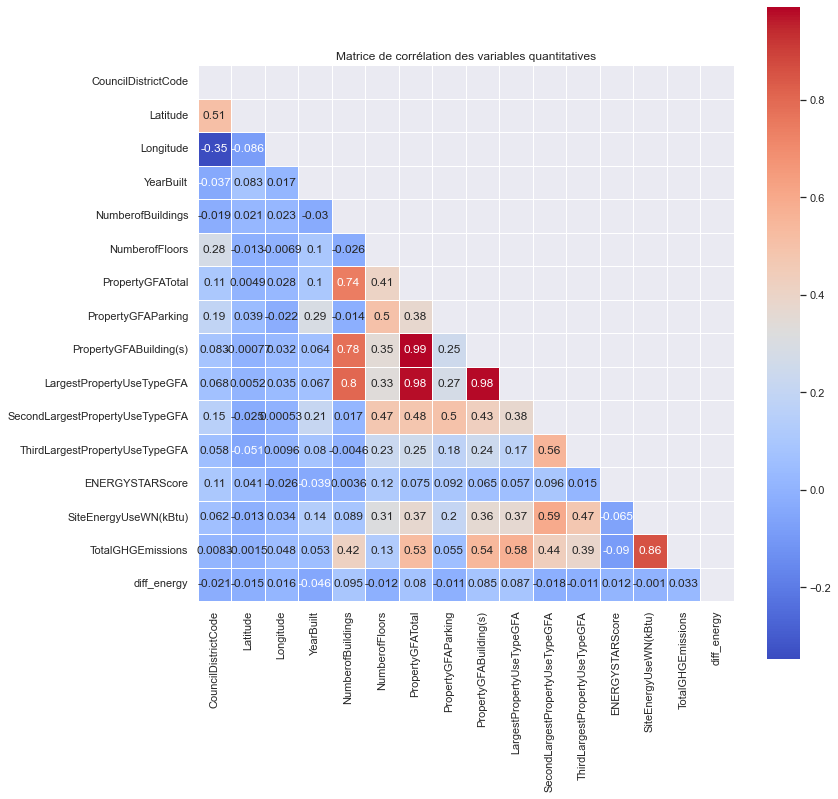

In [1148]:
corr_matrix = data_2016.select_dtypes(include = ['int', 'float']).corr()
mask = np.triu(corr_matrix)
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, cmap="coolwarm", mask=mask, linewidths=.5, annot=True, cbar=True, square=True)
plt.title("Matrice de corrélation des variables quantitatives")
#plt.savefig("Présentation/Images/matrice_corr.png")
plt.show()

In [1184]:
data_2016.drop(['PropertyGFAParking', 'PropertyGFABuilding(s)'], axis = 1, inplace = True)

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_10376\2303682662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2016.drop(['PropertyGFAParking', 'PropertyGFABuilding(s)'], axis = 1, inplace = True)


## 6: Préparation des features

In [1185]:
def groupe_property_use(df):
    property_use = df.loc[:,['LargestPropertyUseType', 
                               'SecondLargestPropertyUseType', 
                               'ThirdLargestPropertyUseType', 
                               'PrimaryPropertyType']]
    
    for col in property_use.columns:
        for ind, val in df[col].value_counts().items():
            if val < 100:
                df[col] = df[col].replace(ind,'Other')
                df[col] = df[col].replace({'Large office':'Office', 'Small- and mid-sized office':'Office', 
                                           'Non-refrigerated warehouse': 'Warehouse'})
    return df
data_2016 = groupe_property_use(data_2016)

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_10376\2695299316.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace(ind,'Other')
C:\Users\Mohamed\AppData\Local\Temp\ipykernel_10376\2695299316.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace({'Large office':'Office', 'Small- and mid-sized office':'Office',
C:\Users\Mohamed\AppData\Local\Temp\ipykernel_10376\2695299316.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [1186]:
def affichage_groupe(df):
    Liste_P_U_T = []
    for colL in  df['LargestPropertyUseType'].unique():
        Liste_P_U_T.append(colL)
    for colS in df['SecondLargestPropertyUseType'].unique():
        Liste_P_U_T.append(colS)
    for colT in df['ThirdLargestPropertyUseType'].unique():
        Liste_P_U_T.append(colT)
    for colP in df['PrimaryPropertyType'].unique():
        Liste_P_U_T.append(colP)
    Liste_P_U_T_U = np.unique(Liste_P_U_T)
    display(Liste_P_U_T_U)
    return Liste_P_U_T_U
affichage_groupe(df = data_2016)

array(['Mixed use property', 'Nothing', 'Office', 'Other', 'Parking',
       'Warehouse'], dtype='<U18')

array(['Mixed use property', 'Nothing', 'Office', 'Other', 'Parking',
       'Warehouse'], dtype='<U18')

In [1151]:
data_2016

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,diff_energy
0,Nonresidential,Hotel,7.0,Downtown,47.61220,-122.33799,1927.0,1.0,12.0,88434,Hotel,88434.0,Nothing,0.0,Nothing,0.0,60.0,7.456910e+06,249.98,6.919110e-06
1,Nonresidential,Hotel,7.0,Downtown,47.61317,-122.33393,1996.0,1.0,11.0,103566,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,8.664479e+06,295.86,0.000000e+00
2,Nonresidential,Hotel,7.0,Downtown,47.61393,-122.33810,1969.0,1.0,41.0,956110,Hotel,756493.0,Nothing,0.0,Nothing,0.0,43.0,7.393711e+07,2089.28,8.265940e-06
3,Nonresidential,Hotel,7.0,Downtown,47.61412,-122.33664,1926.0,1.0,10.0,61320,Hotel,61320.0,Nothing,0.0,Nothing,0.0,56.0,6.946800e+06,286.43,1.103820e-05
4,Nonresidential,Hotel,7.0,Downtown,47.61375,-122.34047,1980.0,1.0,18.0,175580,Hotel,123445.0,Parking,68009.0,Swimming pool,0.0,75.0,1.465650e+07,505.01,7.055865e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,Nonresidential cos,Other,1.0,Delridge neighborhoods,47.54067,-122.37441,1982.0,1.0,1.0,18261,Other - recreation,18261.0,Nothing,0.0,Nothing,0.0,71.0,1.025432e+06,20.33,1.317480e-05
3372,Nonresidential cos,Other,2.0,Downtown,47.59625,-122.32283,2004.0,1.0,1.0,16000,Other - recreation,16000.0,Nothing,0.0,Nothing,0.0,71.0,1.053706e+06,32.17,1.631105e-05
3373,Nonresidential cos,Other,7.0,Magnolia / queen anne,47.63644,-122.35784,1974.0,1.0,1.0,13157,Other - recreation,7583.0,Fitness center/health club/gym,5574.0,Swimming pool,0.0,71.0,6.053764e+06,223.54,3.104460e-06
3374,Nonresidential cos,Mixed use property,1.0,Greater duwamish,47.52832,-122.32431,1989.0,1.0,1.0,14101,Other - recreation,6601.0,Fitness center/health club/gym,6501.0,Pre-school/daycare,484.0,71.0,7.828413e+05,22.11,1.459405e-06


In [1189]:
data_2016['Neighborhood']. unique()

array(['Downtown', 'Northeast', 'East', 'Lake union', 'Greater duwamish',
       'Magnolia / queen anne', 'Ballard', 'Northwest', 'Central',
       'Southwest', 'Southeast', 'Delridge', 'North'], dtype=object)

In [1188]:
data_2016['Neighborhood'] = data_2016['Neighborhood'].replace({'Delridge neighborhoods': 'Delridge'})

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_10376\1039854804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2016['Neighborhood'] = data_2016['Neighborhood'].replace({'Delridge neighborhoods': 'Delridge'})


In [1190]:
data_2016.isna().sum()

BuildingType                       0
PrimaryPropertyType                0
CouncilDistrictCode                0
Neighborhood                       0
Latitude                           0
Longitude                          0
YearBuilt                          0
NumberofBuildings                  0
NumberofFloors                     0
PropertyGFATotal                   0
LargestPropertyUseType             0
LargestPropertyUseTypeGFA          0
SecondLargestPropertyUseType       0
SecondLargestPropertyUseTypeGFA    0
ThirdLargestPropertyUseType        0
ThirdLargestPropertyUseTypeGFA     0
ENERGYSTARScore                    0
SiteEnergyUseWN(kBtu)              0
TotalGHGEmissions                  0
diff_energy                        0
dtype: int64

In [1192]:
data_2016.to_csv('C:/Users/Mohamed/Desktop/formation_data_Scientist/projet_4/Donnees/df_cleaned_2016', index=False)